# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_128'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128),input_shape=(1000,102)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 5
epochs_per_bag = 100
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. ... 1. 1. 1.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               236544    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 244,801
Trainable params: 244,801
Non-trainable params: 0
_________________________________________________________________
Train on 10451 samples, validate on 3732 samples
Epoch 1/100
10451/10451 - 31s - loss: 0.3332 - accuracy: 0.8535 - auc_1: 0.9310 - val_loss: 0.2588 - val_accuracy: 0.8901 - val_auc_1: 0.9568
Epoch 2/100
1045

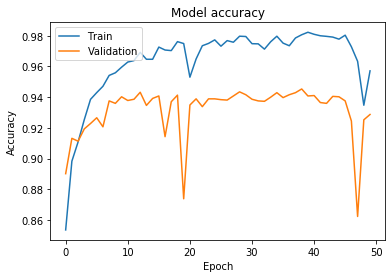

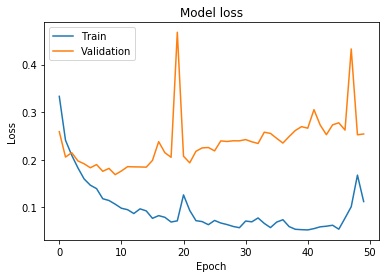

Training bag 1
(14930, 1)
(14930,)
[5.96046448e-07 1.50722265e-03 2.96533108e-05 ... 6.79026246e-02
 1.43051147e-05 0.00000000e+00]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_lstm_128_boost1.csv
[1.00000000e+00 1.00000000e+00 9.99999940e-01 ... 1.78813934e-07
 1.78813934e-07 1.78813934e-07]
Train on 10451 samples, validate on 3732 samples
Epoch 1/100
10451/10451 - 30s - loss: 0.3797 - accuracy: 0.8217 - auc_3: 0.8997 - val_loss: 0.2869 - val_accuracy: 0.8992 - val_auc_3: 0.9500
Epoch 2/100
10451/10451 - 28s - loss: 0.2969 - accuracy: 0.8653 - auc_3: 0.9405 - val_loss: 0.2825 - val_accuracy: 0.9059 - val_auc_3: 0.9585
Epoch 3/100
10451/10451 - 27s - loss: 0.2643 - accuracy: 0.8869 - auc_3: 0.9534 - val_loss: 0.3294 - val_accuracy: 0.8816 - val_auc_3: 0.9562
Epoch 4/100
10451/10451 - 27s - loss: 0.2447 - accuracy: 0.8955 - auc_3: 0.9598 - val_loss: 0.2818 - val_accuracy: 0.9009 - val_auc_3: 0.9627
Epoch 5/100
10451/10451 - 28s - loss: 0.2252 - accuracy: 0.9053 - auc_3: 0.9658 - val_loss: 0.2387 - val_accuracy: 0.9191 - val_auc_3: 0.9678
Epoch 6/100
10451/10451 - 27s - loss: 0.2041 - accuracy: 0.9175 - auc_3: 0.9713 -

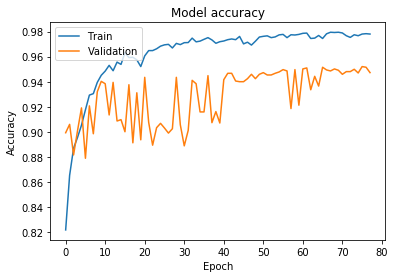

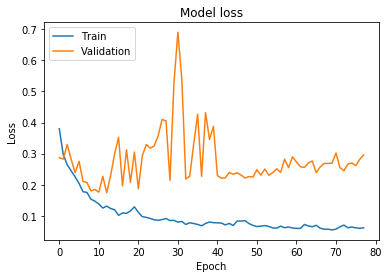

Training bag 2
(14930, 2)
(14930,)
[2.98023224e-07 1.49813294e-03 1.48564577e-05 ... 1.26567736e-01
 1.60932541e-05 4.96178389e-01]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_lstm_128_boost2.csv
[9.98472974e-01 9.98463959e-01 9.98431846e-01 ... 1.01327896e-06
 1.01327896e-06 1.01327896e-06]
Train on 10451 samples, validate on 3732 samples
Epoch 1/100
10451/10451 - 30s - loss: 0.3746 - accuracy: 0.8241 - auc_5: 0.9028 - val_loss: 0.3406 - val_accuracy: 0.8767 - val_auc_5: 0.9284
Epoch 2/100
10451/10451 - 28s - loss: 0.3027 - accuracy: 0.8646 - auc_5: 0.9388 - val_loss: 0.3677 - val_accuracy: 0.8502 - val_auc_5: 0.9464
Epoch 3/100
10451/10451 - 27s - loss: 0.2674 - accuracy: 0.8807 - auc_5: 0.9520 - val_loss: 0.2713 - val_accuracy: 0.8968 - val_auc_5: 0.9602
Epoch 4/100
10451/10451 - 27s - loss: 0.2449 - accuracy: 0.8955 - auc_5: 0.9599 - val_loss: 0.2781 - val_accuracy: 0.8875 - val_auc_5: 0.9656
Epoch 5/100
10451/10451 - 27s - loss: 0.2369 - accuracy: 0.9015 - auc_5: 0.9620 - val_loss: 0.2062 - val_accuracy: 0.9231 - val_auc_5: 0.9731
Epoch 6/100
10451/10451 - 27s - loss: 0.2155 - accuracy: 0.9107 - auc_5: 0.9684 -

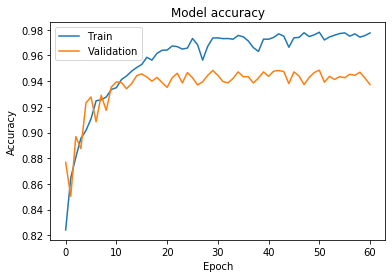

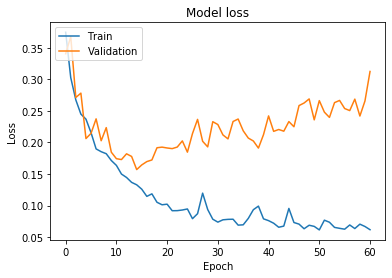

Training bag 3
(14930, 3)
(14930,)
[2.33650208e-05 2.11277604e-03 1.00632506e-05 ... 1.48570940e-01
 1.07288361e-05 3.30835521e-01]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 3)
(6051,)
Saved to result_boosting_lstm_128_boost3.csv
[9.97927706e-01 9.97854253e-01 9.97780939e-01 ... 3.25838732e-06
 3.25838732e-06 3.25838732e-06]
Train on 10451 samples, validate on 3732 samples
Epoch 1/100
10451/10451 - 31s - loss: 0.3831 - accuracy: 0.8193 - auc_7: 0.9021 - val_loss: 0.3141 - val_accuracy: 0.8829 - val_auc_7: 0.9564
Epoch 2/100
10451/10451 - 27s - loss: 0.3065 - accuracy: 0.8667 - auc_7: 0.9396 - val_loss: 0.2753 - val_accuracy: 0.8971 - val_auc_7: 0.9596
Epoch 3/100
10451/10451 - 27s - loss: 0.2701 - accuracy: 0.8837 - auc_7: 0.9532 - val_loss: 0.2032 - val_accuracy: 0.9183 - val_auc_7: 0.9733
Epoch 4/100
10451/10451 - 27s - loss: 0.2439 - accuracy: 0.8945 - auc_7: 0.9615 - val_loss: 0.2302 - val_accuracy: 0.9156 - val_auc_7: 0.9715
Epoch 5/100
10451/10451 - 27s - loss: 0.2257 - accuracy: 0.9067 - auc_7: 0.9668 - val_loss: 0.2134 - val_accuracy: 0.9193 - val_auc_7: 0.9785
Epoch 6/100
10451/10451 - 27s - loss: 0.2022 - accuracy: 0.9167 - auc_7: 0.9729 -

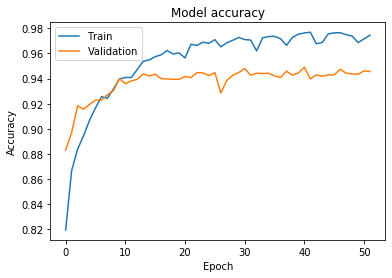

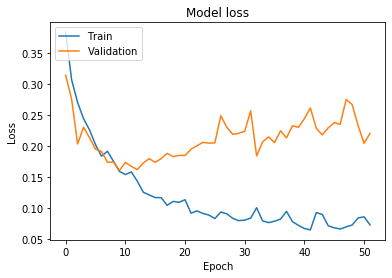

Training bag 4
(14930, 4)
(14930,)
[1.77025795e-05 2.13126093e-03 2.02134252e-05 ... 1.46712035e-01
 9.17911530e-06 2.48126626e-01]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 4)
(6051,)
Saved to result_boosting_lstm_128_boost4.csv
[9.97973517e-01 9.97853026e-01 9.97845158e-01 ... 3.94135714e-06
 3.93390656e-06 3.93390656e-06]
Train on 10451 samples, validate on 3732 samples
Epoch 1/100
10451/10451 - 33s - loss: 0.3851 - accuracy: 0.8175 - auc_9: 0.9008 - val_loss: 0.3500 - val_accuracy: 0.8502 - val_auc_9: 0.9367
Epoch 2/100
10451/10451 - 28s - loss: 0.2997 - accuracy: 0.8647 - auc_9: 0.9424 - val_loss: 0.2896 - val_accuracy: 0.9043 - val_auc_9: 0.9658
Epoch 3/100
10451/10451 - 28s - loss: 0.2704 - accuracy: 0.8839 - auc_9: 0.9535 - val_loss: 0.2726 - val_accuracy: 0.8834 - val_auc_9: 0.9667
Epoch 4/100
10451/10451 - 28s - loss: 0.2448 - accuracy: 0.8947 - auc_9: 0.9617 - val_loss: 0.2134 - val_accuracy: 0.9207 - val_auc_9: 0.9709
Epoch 5/100
10451/10451 - 28s - loss: 0.2218 - accuracy: 0.9072 - auc_9: 0.9684 - val_loss: 0.1968 - val_accuracy: 0.9244 - val_auc_9: 0.9768
Epoch 6/100
10451/10451 - 28s - loss: 0.2078 - accuracy: 0.9153 - auc_9: 0.9721 -

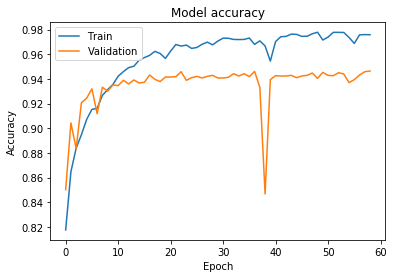

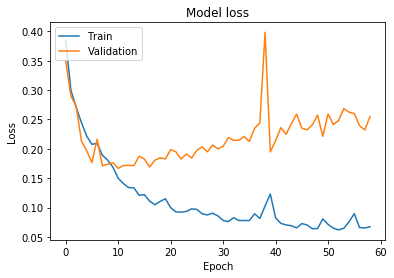

In [3]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*7
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    idx = (-training_loss).argsort()[:train_size]
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='accuracy',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        min_delta=0, 
        patience=10, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=32,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [3]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 5)
(6051,)




## Save Prediction to CSV

In [4]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_boosting_lstm_128.csv
